In [3]:
def loadMnist(path, kind='train'):
    '''
    import the MNIST dataset from path, which is the path of the folder
    kind should be either 'train', which is the training set or 't10k', meaning test-10k pictures
    '''
    imagePath = os.path.join(path, '%s-images.idx3-ubyte' % kind)
    labelPath = os.path.join(path, '%s-labels.idx1-ubyte' % kind)

    with open(labelPath, 'rb') as lbp:
        magic, n = struct.unpack('>II', lbp.read(8))
        label = np.fromfile(lbp, dtype=np.uint8)

    with open(imagePath, 'rb') as imp:
        magic, num, rows, columns = struct.unpack('>IIII', imp.read(16))
        image = np.fromfile(imp, dtype=np.uint8)
        image = image.reshape(len(label),784)

    return image, label,

In [13]:
import numpy as np
import os 
import struct
import pandas as pd

In [5]:
trainSet, trainLabels = loadMnist('MNIST', 'train')
test, testLabels = loadMnist('MNIST', 't10k')

In [9]:
trainLabels[0]

5

In [14]:
pd.Series(testLabels).unique()

array([7, 2, 1, 0, 4, 9, 5, 6, 3, 8], dtype=uint64)

In [17]:
import scipy

In [2]:
import scipy.special
import numpy as np
import os 
import struct

class neuralNetwork:

    def __init__(self, inNodes, hiddenNodes, outNodes, lr, activation='sigmoid'):
        self.inNodes = inNodes
        self.hiddenNodes = hiddenNodes
        self.outNodes = outNodes
        self.lr = lr
        self.wih = np.random.normal(0.0, pow(self.hiddenNodes, -0.5), (self.hiddenNodes, self.inNodes))
        self.who = np.random.normal(0.0, pow(self.outNodes, -0.5), (self.outNodes, self.hiddenNodes))
        def SIGMOID(x):
            return 1/(1+np.exp(-x))

        if activation == 'sigmoid':
            self.activation = lambda x:scipy.special.expit(x)
        else:
            self.activation = lambda x:x
        
    def train(self, inputVector,labels):
        inputs = inputVector.reshape(-1,1)
        labels = labels.reshape(-1,1)
        hiddenInputs = np.dot(self.wih, inputs)
        hiddenOutputs = self.activation(hiddenInputs)
        finalInputs = np.dot(self.who, hiddenOutputs)
        finalOutputs = self.activation(finalInputs)
        outputError = labels - finalOutputs
        hiddenError = np.dot(self.who.T, outputError)
        self.who += self.lr*np.dot(outputError*finalOutputs*(1-finalOutputs), hiddenOutputs.T)
        self.wih += self.lr*np.dot(hiddenError*hiddenInputs*(1-hiddenInputs), inputs.T)
   
    def forward(self, inputVector):
        inputs = inputVector.reshape(-1,1)
        hiddenInputs = np.dot(self.wih, inputs)
        hiddenOutputs = self.activation(hiddenInputs)
        finalInputs = np.dot(self.who, hiddenOutputs)
        finalOutputs = self.activation(finalInputs)
        
        return finalOutputs

        
def loadMnist(path, kind='train'):
    '''
    import the MNIST dataset from path, which is the path of the folder
    kind should be either 'train', which is the training set or 't10k', meaning test-10k pictures
    '''
    imagePath = os.path.join(path, '%s-images.idx3-ubyte' % kind)
    labelPath = os.path.join(path, '%s-labels.idx1-ubyte' % kind)

    with open(labelPath, 'rb') as lbp:
        magic, n = struct.unpack('>II', lbp.read(8))
        label = np.fromfile(lbp, dtype=np.uint8)

    with open(imagePath, 'rb') as imp:
        magic, num, rows, columns = struct.unpack('>IIII', imp.read(16))
        image = np.fromfile(imp, dtype=np.uint8)
        image = image.reshape(len(label),784)

    return image, label, 
    


In [3]:
trainSet, trainLabels = loadMnist('MNIST', 'train')
test, testLabels = loadMnist('MNIST', 't10k')
trainSet = (np.asfarray(trainSet[:]) /255 *0.99)+0.01
test = (np.asfarray(test[:]) /255 *0.99)+0.01
nn = neuralNetwork(trainSet[0].shape[0], 1000, 12, 1)


In [7]:
for i in range(1000):
    nn.train(trainSet[i], trainLabels[i])

for i in range(300):
    outputArg = np.argmax(nn.forward(test[i]).reshape(-1))
    right = 0
    if outputArg == trainLabels[i]:
        right += 1
print('accuracy = %f' % (right/30))


D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in multiply
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in add


KeyboardInterrupt: 

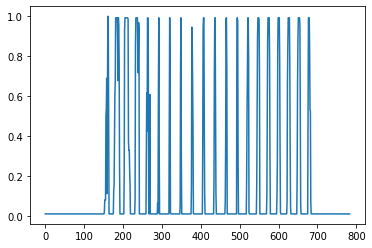

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(trainSet[0])

In [9]:
trainLabels[1]

0

In [11]:
b=np.zeros(10)
b[1] =1 
b

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])